<h1>An Analysis & Prediction of New York City Housing Complaints</h1>

<h2>Problem Statement</h2>
<h3>Definition:</h3>
The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.
In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is possibly impacting the overall efficiency of operations of the agency.
Therefore, a better solution for Department of Housing Preservation and Development will probably help them to manage the large volume of 311 complaints they are receiving every year.

<h3>Questions to be solved:</h3>

1.	Which complaint type should the Department of Housing Preservation and Development of New York City focus on first?

2.	Should the Department of Housing Preservation and Development of New York City focus on any specific geographical area (borough, zip codes, or street) for the determined complaint type?

3.	Is there any obvious relationship between the characteristics of a house or building in the determined geographical area and the determined complaint type?

4.	Can a predictive model be built for future possible complaints of the determined complaint type?

<h3>Datasets to be used:</h3>

For this project, we are planning to use the following 3 datasets to analyse & solve the questions stated above. 

1.	311-complaint dataset that contains information on complaints to the Department related to housing and building complaints https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

2.	PLUTO dataset which has information on every building's characteristics https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v1.zip

3.	We also found a coordinate data on the boundaries of New York boroughs that will be useful to help visualise the locations of a sample of heating complaints https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm


<h3>311 Complaint Dataset</h3>
The dataset I used was made available on an IBM server which was easier to access & work https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0720EN-SkillsNetwork/labs/Module%201/data/311_Service_Requests_from_2010_to_Present_min.csv 

The original dataset is available at https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9 which can be downloaded by using the API. 

This dataset contains metadata of complaints made to the Department relating to housing and building problems. The original 311 complaint dataset has 46 columns of information however, for this project, we are planning to use only a selection of the following columns to analyse the data. These were:

•	Created Date - The date and time the complaint was made and entered into the 311 system

•	Closed Date - The date and time the complaint was closed by the department

•	Complaint Type - The category of complaint identifying the topic of the incident or condition

•	Location Type - Describes the type of location used in the address information

•	Incident Zip - Incident location zip code

•	Incident Address - House number of incident address provided by submitter

•	Street Name - Street name of incident address provided by the submitter

•	Address Type - Type of incident location information available

•	City - City of the incident location

•	Status - Status of the complaint

•	Resolution Description - Describes the last action taken on the incident. May describe next or future steps

•	Borough - Borough of the incident location provided by the submitter

•	Latitude - Geo based Lat of the incident location

•	Longitude - Geo based Lat of the incident location


<h3>PLUTO dataset for housing</h3>

The PLUTO dataset which contains information on every building in New York City's characteristic will be used to find whether complaints have any correlation with complaints being made.  obtained the data set from here: https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v1.zip. This dataset contains a lot of information about individual buildings but the features we are planning to use in the analysis were:

•	Lot Number - The number of the tax lot

•	ZipCode - The zip code that the tax lot is located in

•	Address - The address of the tax lot

•	Lot Area - The total area of the tax lot in square feet

•	Building Area - The total gross building floor area in square feet

•	Residential Area - An estimate of the exterior dimensions of the portion of the structure(s) allocated for residential use

•	Office Area - An estimate of the exterior dimensions of the portion of the structure(s) allocated for office use

•	Retail Area - An estimate of the exterior dimensions of the portion of the structure(s) allocated for retail use

•	Num of Buildings - The number of buildings on the tax lot

•	Num of Floors - In the tallest building on the tax lot, the number of full and partial stories starting from the ground floor

•	Lot Depth - The tax lot's depth measured in feet

•	Building Depth - The building’s depth, which is the effective perpendicular distance, measured in feet

•	Year Built - The year construction of the building was completed

•	Year 1st Altered - If a building has only been altered once, this value is the date of the alteration. If a building has been altered more than once, this value is the year of the second most recent alteration.

•	Floor Area Ratio - The Built Floor Area Ratio (FAR) is the total building floor area divided by the area of the tax lot

•	Max Residential FAR - The Maximum Allowable Residential Floor Area Ratio (FAR)

•	Max Commercial FAR - The Maximum Allowable Commercial Floor Area Ratio (FAR)

•	Max Facility FAR - The Maximum Allowable Community Facility Floor Area Ratio (FAR)

•	X Coord - The X coordinate of the XY coordinate pair which depicts the approximate location of the lot.

•	Y Coord - The Y coordinate of the XY coordinate pair which depicts the approximate location of the lot.


<h3>Data on borough boundaries in New York</h3>

This contained geographical data about the boundaries of the boroughs in New York in a GeoJSON format. This will be useful to help with the analysis of the geographical effects on the number of complaints made. This data can be accessed from https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm.



<h2> Analysis & Methodology </h2>

<h3>1.	Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?</h3>

In [85]:
import pandas as pd
import numpy as np 
import wget
import itertools
import folium
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import jaccard_score
%matplotlib inline


from sodapy import Socrata
client = Socrata("data.cityofnewyork.us", None)
client.timeout = 10000
results = client.get("erm2-nwe9", limit=1000000)
NY311_dff = pd.DataFrame.from_records(results)

In [86]:
NY311_df = pd.read_csv("311_Service_Requests_from_2010_to_Present_min.csv")
NY311_df.drop("Unnamed: 0", axis =1, inplace=True)
NY311_df.set_index("Unique Key", inplace=True)
NY311_df.sort_index(inplace=True)
NY311_df.head()

Created Date             Closed Date Complaint Type  \
Unique Key                                                                  
15629728    01/01/2010 12:00:00 AM  01/12/2010 12:00:00 AM        HEATING   
15629899    01/01/2010 12:00:00 AM  01/16/2010 12:00:00 AM       PLUMBING   
15630099    01/01/2010 12:00:00 AM  01/01/2010 12:00:00 AM        HEATING   
15630315    01/01/2010 12:00:00 AM  01/16/2010 12:00:00 AM       PLUMBING   
15630431    01/01/2010 12:00:00 AM  01/02/2010 12:00:00 AM        HEATING   

                   Location Type  Incident Zip      Incident Address  \
Unique Key                                                             
15629728    RESIDENTIAL BUILDING       11210.0    3101 FOSTER AVENUE   
15629899    RESIDENTIAL BUILDING       11106.0       31-54 29 STREET   
15630099    RESIDENTIAL BUILDING       10466.0  1405 EAST 233 STREET   
15630315    RESIDENTIAL BUILDING       11106.0       31-54 29 STREET   
15630431    RESIDENTIAL BUILDING       11226.0    22 MARTENSE STREET   

                Street Name Address Type      City  Status  \
Unique Key                                                   
15629728      FOSTER AVENUE      ADDRESS  BROOKLYN  Closed   
15629899          29 STREET      ADDRESS   ASTORIA  Closed   
15630099    EAST 233 STREET      ADDRESS     BRONX  Closed   
15630315          29 STREET      ADDRESS   ASTORIA  Closed   
15630431    MARTENSE STREET      ADDRESS  BROOKLYN  Closed   

                                       Resolution Description      Borough  \
Unique Key                                                                   
15629728    The Department of Housing Preservation and Dev...  Unspecified   
15629899    The Department of Housing Preservation and Dev...  Unspecified   
15630099    The Department of Housing Preservation and Dev...  Unspecified   
15630315    The Department of Housing Preservation and Dev...  Unspecified   
15630431    More than one complaint was received for this ...  Unspecified   

             Latitude  Longitude  
Unique Key                        
15629728    40.638696 -73.946969  
15629899    40.764035 -73.925935  
15630099    40.888997 -73.836192  
15630315    40.764035 -73.925935  
15630431    40.651236 -73.958293

In [87]:
print(NY311_df.shape)
print("Number of Complaints:", NY311_df.shape[0])

(6019843, 14)
Number of Complaints: 6019843


In [88]:
NY311_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019843 entries, 15629728 to 45532043
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Created Date            object 
 1   Closed Date             object 
 2   Complaint Type          object 
 3   Location Type           object 
 4   Incident Zip            float64
 5   Incident Address        object 
 6   Street Name             object 
 7   Address Type            object 
 8   City                    object 
 9   Status                  object 
 10  Resolution Description  object 
 11  Borough                 object 
 12  Latitude                float64
 13  Longitude               float64
dtypes: float64(3), object(11)
memory usage: 688.9+ MB


In [89]:
NY311_df.columns

Index(['Created Date', 'Closed Date', 'Complaint Type', 'Location Type',
       'Incident Zip', 'Incident Address', 'Street Name', 'Address Type',
       'City', 'Status', 'Resolution Description', 'Borough', 'Latitude',
       'Longitude'],
      dtype='object')

In [90]:
NY311_df["Created Date"] = pd.to_datetime(NY311_df["Created Date"], format="%m/%d/%Y %I:%M:%S %p")
NY311_df["Closed Date"] = pd.to_datetime(NY311_df["Closed Date"], format="%m/%d/%Y %I:%M:%S %p")
NY311_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019843 entries, 15629728 to 45532043
Data columns (total 14 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Created Date            datetime64[ns]
 1   Closed Date             datetime64[ns]
 2   Complaint Type          object        
 3   Location Type           object        
 4   Incident Zip            float64       
 5   Incident Address        object        
 6   Street Name             object        
 7   Address Type            object        
 8   City                    object        
 9   Status                  object        
 10  Resolution Description  object        
 11  Borough                 object        
 12  Latitude                float64       
 13  Longitude               float64       
dtypes: datetime64[ns](2), float64(3), object(9)
memory usage: 688.9+ MB


In [91]:
print("Complaints since: ", NY311_df["Created Date"].min())
print("Complaints till:", NY311_df["Closed Date"].max())

Complaints since:  2010-01-01 00:00:00
Complaints till: 2020-02-02 21:42:28


In [92]:
MIA = NY311_df["Incident Address"].isnull().sum() 
def roundup(MIA):
    return int(np.math.floor(MIA/100.0))*100
print("Approximately", roundup(MIA), "incidents have a missing Incident Address")

Approximately 52800 incidents have a missing Incident Address


In [93]:
#No. of Complaint Types
print(NY311_df["Complaint Type"].value_counts())
print("There seems to be approximately", NY311_df["Complaint Type"].value_counts().count(), "complaint types")
print("There seems to be approximately", NY311_df["Complaint Type"].value_counts().sum(), "complaints")

HEAT/HOT WATER            1261574
HEATING                    887850
PLUMBING                   711130
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       451643
PAINT - PLASTER            361257
PAINT/PLASTER              346438
ELECTRIC                   307310
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    151308
FLOORING/STAIRS            137402
APPLIANCE                  112831
HPD Literature Request      52824
SAFETY                      51529
OUTSIDE BUILDING             7142
ELEVATOR                     6725
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
Outside Building                6
VACANT APARTMENT                6
Appliance                       4
Mold                            1
Electric      

In [94]:
NY311_df["Complaint Type"] = NY311_df["Complaint Type"].str.upper()
NY311_df["Complaint Type"].unique()

array(['HEATING', 'PLUMBING', 'HPD LITERATURE REQUEST', 'PAINT - PLASTER',
       'GENERAL CONSTRUCTION', 'NONCONST', 'CONSTRUCTION', 'ELECTRIC',
       'APPLIANCE', 'PAINT/PLASTER', 'GENERAL', 'STRUCTURAL', 'SAFETY',
       'UNSANITARY CONDITION', 'WATER LEAK', 'DOOR/WINDOW',
       'FLOORING/STAIRS', 'HEAT/HOT WATER', 'OUTSIDE BUILDING',
       'ELEVATOR', 'AGENCY', 'VACANT APARTMENT', 'MOLD'], dtype=object)

In [95]:
#Merge duplicate complaint type categories
replace_categories = {"HEAT/HOT WATER" : "HEATING", "CONSTRUCTION": "GENERAL CONSTRUCTION", "PAINT - PLASTER" : "PAINT/PLASTER", "Electric": "ELECTRIC"}

NY311_df["Complaint Type"] = NY311_df["Complaint Type"].replace(replace_categories)
NY311_df["Complaint Type"].unique()

array(['HEATING', 'PLUMBING', 'HPD LITERATURE REQUEST', 'PAINT/PLASTER',
       'GENERAL CONSTRUCTION', 'NONCONST', 'ELECTRIC', 'APPLIANCE',
       'GENERAL', 'STRUCTURAL', 'SAFETY', 'UNSANITARY CONDITION',
       'WATER LEAK', 'DOOR/WINDOW', 'FLOORING/STAIRS', 'OUTSIDE BUILDING',
       'ELEVATOR', 'AGENCY', 'VACANT APARTMENT', 'MOLD'], dtype=object)

In [96]:
print(NY311_df["Complaint Type"].value_counts())
print("There are exactly", NY311_df["Complaint Type"].value_counts().nunique(), "complaint types")

HEATING                   2149424
PLUMBING                   711141
PAINT/PLASTER              707695
GENERAL CONSTRUCTION       505941
UNSANITARY CONDITION       457142
ELECTRIC                   307311
NONCONST                   260890
DOOR/WINDOW                205278
WATER LEAK                 193631
GENERAL                    152471
FLOORING/STAIRS            137402
APPLIANCE                  112835
HPD LITERATURE REQUEST      52824
SAFETY                      51953
OUTSIDE BUILDING             7148
ELEVATOR                     6725
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                6
MOLD                            1
Name: Complaint Type, dtype: int64
There are exactly 20 complaint types


<h3> Complaint Type Result </h3>

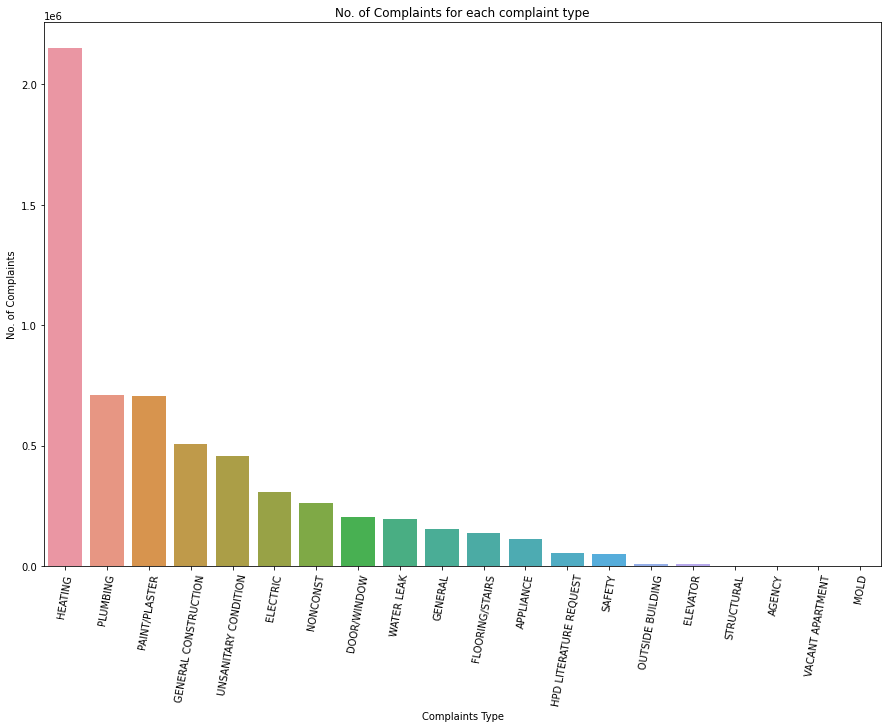

In [97]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = ['HEATING' ,'PLUMBING', 'PAINT/PLASTER',             
'GENERAL CONSTRUCTION',      
'UNSANITARY CONDITION',       
'ELECTRIC',                   
'NONCONST',                   
'DOOR/WINDOW',                
'WATER LEAK',                 
'GENERAL',                    
'FLOORING/STAIRS',            
'APPLIANCE',                  
'HPD LITERATURE REQUEST',      
'SAFETY',                      
'OUTSIDE BUILDING',             
'ELEVATOR',                     
'STRUCTURAL',                     
'AGENCY',                          
'VACANT APARTMENT',                
'MOLD']
, y=NY311_df["Complaint Type"].value_counts())
ax.set(xlabel="Complaints Type", ylabel="No. of Complaints")
ax.set_title("No. of Complaints for each complaint type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
plt.show()

In [98]:
print(NY311_df["Complaint Type"].value_counts()>1000000)
print("\nFrom analysing the data, it was discovered that complaints related to heating occurred the most with over 2,149,424 complaints compared to the next highest with only 711,141 complaints in PLUMBING in comparison. Therefore, Complaint types that we can recommend the Department of Housing Preservation and Development of New York City to address or focus on first is HEATING")

HEATING                    True
PLUMBING                  False
PAINT/PLASTER             False
GENERAL CONSTRUCTION      False
UNSANITARY CONDITION      False
ELECTRIC                  False
NONCONST                  False
DOOR/WINDOW               False
WATER LEAK                False
GENERAL                   False
FLOORING/STAIRS           False
APPLIANCE                 False
HPD LITERATURE REQUEST    False
SAFETY                    False
OUTSIDE BUILDING          False
ELEVATOR                  False
STRUCTURAL                False
AGENCY                    False
VACANT APARTMENT          False
MOLD                      False
Name: Complaint Type, dtype: bool

From analysing the data, it was discovered that complaints related to heating occurred the most with over 2,149,424 complaints compared to the next highest with only 711,141 complaints in PLUMBING in comparison. Therefore, Complaint types that we can recommend the Department of Housing Preservation and Development of New Yo

In [99]:
NY311_df.to_csv('NY311_df_clean.csv')

<h3>2.	Should the Department of Housing Preservation and Development of New York City focus on any specific geographical area (borough, zip codes, or street) for the determined complaint type? </h3>

In [100]:
NY311_df = pd.read_csv("NY311_df_clean.csv")
NY311_df.head()

Unique Key         Created Date          Closed Date Complaint Type  \
0    15629728  2010-01-01 00:00:00  2010-01-12 00:00:00        HEATING   
1    15629899  2010-01-01 00:00:00  2010-01-16 00:00:00       PLUMBING   
2    15630099  2010-01-01 00:00:00  2010-01-01 00:00:00        HEATING   
3    15630315  2010-01-01 00:00:00  2010-01-16 00:00:00       PLUMBING   
4    15630431  2010-01-01 00:00:00  2010-01-02 00:00:00        HEATING   

          Location Type  Incident Zip      Incident Address      Street Name  \
0  RESIDENTIAL BUILDING       11210.0    3101 FOSTER AVENUE    FOSTER AVENUE   
1  RESIDENTIAL BUILDING       11106.0       31-54 29 STREET        29 STREET   
2  RESIDENTIAL BUILDING       10466.0  1405 EAST 233 STREET  EAST 233 STREET   
3  RESIDENTIAL BUILDING       11106.0       31-54 29 STREET        29 STREET   
4  RESIDENTIAL BUILDING       11226.0    22 MARTENSE STREET  MARTENSE STREET   

  Address Type      City  Status  \
0      ADDRESS  BROOKLYN  Closed   
1      ADDRESS   ASTORIA  Closed   
2      ADDRESS     BRONX  Closed   
3      ADDRESS   ASTORIA  Closed   
4      ADDRESS  BROOKLYN  Closed   

                              Resolution Description      Borough   Latitude  \
0  The Department of Housing Preservation and Dev...  Unspecified  40.638696   
1  The Department of Housing Preservation and Dev...  Unspecified  40.764035   
2  The Department of Housing Preservation and Dev...  Unspecified  40.888997   
3  The Department of Housing Preservation and Dev...  Unspecified  40.764035   
4  More than one complaint was received for this ...  Unspecified  40.651236   

   Longitude  
0 -73.946969  
1 -73.925935  
2 -73.836192  
3 -73.925935  
4 -73.958293

In [101]:
heating_df = NY311_df[NY311_df["Complaint Type"]=="HEATING"].reset_index()


In [102]:
heating_df.drop(["index", "Created Date", "Unique Key", "Resolution Description", "Closed Date", "Location Type", "Address Type"], axis=1, inplace=True)
heating_df.head()

Complaint Type  Incident Zip      Incident Address      Street Name  \
0        HEATING       11210.0    3101 FOSTER AVENUE    FOSTER AVENUE   
1        HEATING       10466.0  1405 EAST 233 STREET  EAST 233 STREET   
2        HEATING       11226.0    22 MARTENSE STREET  MARTENSE STREET   
3        HEATING       11212.0  1115 WILLMOHR STREET  WILLMOHR STREET   
4        HEATING       11210.0    3103 FOSTER AVENUE    FOSTER AVENUE   

       City  Status      Borough   Latitude  Longitude  
0  BROOKLYN  Closed  Unspecified  40.638696 -73.946969  
1     BRONX  Closed  Unspecified  40.888997 -73.836192  
2  BROOKLYN  Closed  Unspecified  40.651236 -73.958293  
3  BROOKLYN  Closed  Unspecified  40.657228 -73.917447  
4  BROOKLYN  Closed  Unspecified  40.638696 -73.946947

In [103]:
print("There are", heating_df.shape[0], "complaints")
print("Open cases:", (heating_df["Status"]=="Open").sum())
print("Closed cases:", (heating_df["Status"]=="Closed").sum())
print("Pending cases:", (heating_df["Status"]=="Pending").sum())

There are 2149424 complaints
Open cases: 16091
Closed cases: 2133331
Pending cases: 2


<h3> Exploring the frequency of complaints depending on location </h3>

In [104]:
# Creating a dataframe for number of complaints for each borough
borough_df=pd.DataFrame({"Number of Complaints": heating_df.groupby(["Borough"]).size()}).reset_index()
borough_df["Borough"] = borough_df["Borough"].str.title()
borough_df.drop(5, axis=0, inplace=True)
borough_df.sort_values(by="Number of Complaints", ascending=False, inplace=True)
borough_df.head()

Borough  Number of Complaints
0          Bronx                606133
1       Brooklyn                574845
2      Manhattan                423039
3         Queens                244122
4  Staten Island                 18368

<h3> Geographical Results </h3>

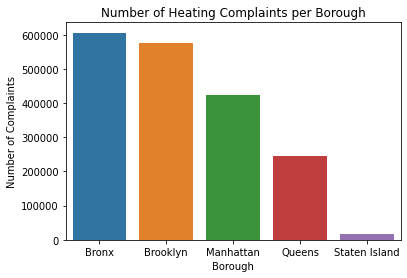

In [105]:
# Visualise the borough dataframe
ax = sns.barplot(x="Borough", y="Number of Complaints", data=borough_df)
ax.set_title("Number of Heating Complaints per Borough")
plt.show()

For geographical analysis of the heating complaints, we have decided to create a visualization of the complaints on a map of the boroughs of New York. As the heating dataframe contains over two million entries, we have decided to plot only a small sample of 1000 randomly selected complaints

In [106]:
# make a new data frame of a smaller size and make sure the all have the coordinate data by dropping rows with empty values
heating_loc_df = heating_df.dropna(axis=0).sample(n=1000)
heating_loc_df.shape

(1000, 9)

In [107]:
# download the geojson file for the boroughs in New York City
!wget --quiet https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm -O Borough Boundaries.geojson


#url = 'https://data.cityofnewyork.us/resource/7t3b-ywvw.geojson'
#filename = wget.download(url)
borough_bounds = r"Borough Boundaries.geojson"

# create choropleth map of NYC boroughs
borough_map = folium.Map(location=[40.72, -73.9], tiles="cartodbpositron", zoom_start=10)
folium.Choropleth(
    geo_data=borough_bounds,
    name="choropleth",
    data=borough_df,
    columns=["Borough", "Number of Complaints"],
    key_on='feature.properties.boro_name',
    fill_color='YlGnBu',
    line_opacity=0.2
).add_to(borough_map)

# instantiate a feature group for the complaints in the dataframe
complaints = folium.map.FeatureGroup()

# for each complaint, plot the coordinates
for lat, lng, in zip(heating_loc_df.Latitude, heating_loc_df.Longitude):
    complaints.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='purple',
            fill=True,
            fill_color='white',
            fill_opacity=0.6
        )
    )

# add the coordinates to the map
borough_map.add_child(complaints)

# If the map cannot be shown to you, access it through this file
borough_map.save("Borough complaint map.html")

# Show the map
borough_map

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [108]:
heating_df.to_csv("heating_df.csv")

<h3> 3. Is there any obvious relationship between the characteristics of a house or building in the determined geographical area and the determined complaint type? </h3>

As the Bronx has the highest number of heating complaints out of all the boroughs we focussed on the information for houses and buildings that are located in the Bronx. 

In [109]:
#import heating dataset
heating_df = pd.read_csv("heating_df.csv").drop("Unnamed: 0", axis=1)

In [110]:
# import housing information dataset
house_df = pd.read_csv("PLUTO_for_WEB/BX_18v1.csv", usecols=["Address", "BldgArea", "BldgDepth", "BuiltFAR", "CommFAR", "FacilFAR", "Lot", "LotArea", "LotDepth", "NumBldgs", "NumFloors", "OfficeArea", "ResArea", "ResidFAR", "RetailArea","YearBuilt", "YearAlter1", "ZipCode", "YCoord","XCoord"])


In [111]:
#Filtering Heating Complaints to Bronx
bronx_heating_df = heating_df[heating_df["Borough"]=="BRONX"]
bronx_heating_df = bronx_heating_df.dropna(subset=["Street Name", "Incident Zip"])
bronx_heating_df.drop(["Status", "Latitude", "Longitude", "City", "Borough"], axis=1, inplace=True)
bronx_heating_df.reset_index(drop=True, inplace=True)
bronx_heating_df.head()

Complaint Type  Incident Zip       Incident Address       Street Name
0        HEATING       10468.0  2781 RESERVOIR AVENUE  RESERVOIR AVENUE
1        HEATING       10453.0     10 WEST 182 STREET   WEST 182 STREET
2        HEATING       10468.0   2420 DAVIDSON AVENUE   DAVIDSON AVENUE
3        HEATING       10460.0     1536 LELAND AVENUE     LELAND AVENUE
4        HEATING       10460.0      770 GARDEN STREET     GARDEN STREET

In [112]:
bronx_heating_df.isnull().sum()

Complaint Type      0
Incident Zip        0
Incident Address    0
Street Name         0
dtype: int64

In [113]:
bronx_heating_df.shape

(600147, 4)

In [114]:
column_names = {"Lot": "Lot Number", "LotArea": "Lot Area", "BldgArea": "Building Area", "ResArea": "Residential Area", "OfficeArea": "Office Area", "RetailArea": "Retail Area", "NumBldgs": "Num of Buildings", "NumFloors": "Num of Floors", "LotDepth": "Lot Depth","BldgDepth": "Building Depth", "YearBuilt": "Year Built", "YearAlter1": "Year 1st Altered","BuiltFAR": "Building Floor Area Ratio", "ResidFAR": "Max Residential FAR", "CommFAR": "Max Commercial FAR","FacilFAR": "Max Facility FAR", "XCoord": "X Coord", "YCoord": "Y Coord"}

house_df.rename(columns=column_names, inplace=True)

In [115]:
house_df.shape

(89854, 20)

In [116]:
house_df.dtypes

Lot Number                     int64
ZipCode                      float64
Address                       object
Lot Area                       int64
Building Area                  int64
Residential Area               int64
Office Area                    int64
Retail Area                    int64
Num of Buildings               int64
Num of Floors                float64
Lot Depth                    float64
Building Depth               float64
Year Built                     int64
Year 1st Altered               int64
Building Floor Area Ratio    float64
Max Residential FAR          float64
Max Commercial FAR           float64
Max Facility FAR             float64
X Coord                      float64
Y Coord                      float64
dtype: object

In [118]:
house_df.dropna(subset=["ZipCode", "Address"], inplace=True)
house_df.head()

Lot Number  ZipCode                 Address  Lot Area  Building Area  \
0           1  10454.0  122 BRUCKNER BOULEVARD     15000              0   
1           4  10454.0  126 BRUCKNER BOULEVARD     13770            752   
2          10  10454.0  138 BRUCKNER BOULEVARD     35000          39375   
3          17  10454.0  144 BRUCKNER BOULEVARD      2500          12500   
4          18  10454.0  148 BRUCKNER BOULEVARD      1875           8595   

   Residential Area  Office Area  Retail Area  Num of Buildings  \
0                 0            0            0                 1   
1                 0          272            0                 2   
2                 0            0            0                 1   
3             12500            0            0                 1   
4              6876            0         1719                 1   

   Num of Floors  Lot Depth  Building Depth  Year Built  Year 1st Altered  \
0            0.0      200.0             0.0           0                 0   
1            1.0      100.0            16.0        1931              1994   
2            2.0      200.0           200.0        1931                 0   
3            5.0      100.0            85.0        1931              2001   
4            5.0       75.0            70.0        1920              2009   

   Building Floor Area Ratio  Max Residential FAR  Max Commercial FAR  \
0                       0.00                 6.02                 5.0   
1                       0.05                 6.02                 5.0   
2                       1.13                 6.02                 5.0   
3                       5.00                 6.02                 5.0   
4                       4.58                 6.02                 5.0   

   Max Facility FAR    X Coord   Y Coord  
0               6.5  1005957.0  232162.0  
1               6.5  1006076.0  232156.0  
2               6.5  1006187.0  232036.0  
3               6.5  1006299.0  232033.0  
4               6.5  1006363.0  232040.0

<h3> Analysis of Correlations Between Building Characteristics and Complaints </h3>

To analyse the correlation between heating complaints being made and the characteristics of buildings we employed two approaches:

1. Use a binary approach where the features will either end in a complaint being made (represented by a 1) or not (represented by a 0)
2. Using total number of complaints for each street to analyse correlation

To find out if there is any correlation, we have calculated the Pearson correlation and p-values for the features of the buildings and the target. Lastly, we have created a correlation matrix to help visualise the Pearson correlations.

<h3> First Approach </h3>

we first created a new dataframe that from the heating complaints and added a new column of ones to indicate the locations where a heating complaint was made. we have also deleted the "Complaint Type" column as it was not needed for the analysis.

In [119]:
binary_heating_df = bronx_heating_df
binary_heating_df["Complaint Made"] = np.ones(len(binary_heating_df), dtype=int)
binary_heating_df.drop("Complaint Type", axis=1, inplace=True)
binary_heating_df.head()

Incident Zip       Incident Address       Street Name  Complaint Made
0       10468.0  2781 RESERVOIR AVENUE  RESERVOIR AVENUE               1
1       10453.0     10 WEST 182 STREET   WEST 182 STREET               1
2       10468.0   2420 DAVIDSON AVENUE   DAVIDSON AVENUE               1
3       10460.0     1536 LELAND AVENUE     LELAND AVENUE               1
4       10460.0      770 GARDEN STREET     GARDEN STREET               1

We then merged this new dataframe with the dataframe containing building features by the corresponding addresses. 

This means that the two dataframes are now merged together where rows with the same address will be aligned together. 

We deleted columns that were no longer needed (these were geographical data which was only used for the merging of datasets). 

Lastly, we inserted zeros in the rows where there was no complaint made. 

We now have one dataframe that had the building address as the ID, a column of ones and zeros for complaints made, and building features.

In [120]:
binary_heating_df.isnull().sum()

Incident Zip        0
Incident Address    0
Street Name         0
Complaint Made      0
dtype: int64

In [121]:
house_df.isnull().sum()

Lot Number                      0
ZipCode                         0
Address                         0
Lot Area                        0
Building Area                   0
Residential Area                0
Office Area                     0
Retail Area                     0
Num of Buildings                0
Num of Floors                   0
Lot Depth                       0
Building Depth                  0
Year Built                      0
Year 1st Altered                0
Building Floor Area Ratio       0
Max Residential FAR             0
Max Commercial FAR              0
Max Facility FAR                0
X Coord                      2931
Y Coord                      2931
dtype: int64

In [122]:
merged_df = pd.merge(binary_heating_df, house_df, how="right", left_on=["Street Name", "Incident Zip"], right_on=["Address", "ZipCode"] )

In [123]:
merged_df["Complaint Made"].fillna(0, inplace=True)

In [124]:
merged_df["Incident Address"].fillna(merged_df["Address"], inplace=True)

In [125]:
merged_df.drop(["Street Name", "Incident Zip", "Address", "ZipCode", "X Coord", "Y Coord"], axis=1, inplace=True)

In [126]:
merged_df.isnull().sum()

Incident Address             0
Complaint Made               0
Lot Number                   0
Lot Area                     0
Building Area                0
Residential Area             0
Office Area                  0
Retail Area                  0
Num of Buildings             0
Num of Floors                0
Lot Depth                    0
Building Depth               0
Year Built                   0
Year 1st Altered             0
Building Floor Area Ratio    0
Max Residential FAR          0
Max Commercial FAR           0
Max Facility FAR             0
dtype: int64

In [127]:
merged_df["Complaint Made"] = merged_df["Complaint Made"].astype(int)
merged_df.head(10)

Incident Address  Complaint Made  Lot Number  Lot Area  \
0  122 BRUCKNER BOULEVARD               0           1     15000   
1  126 BRUCKNER BOULEVARD               0           4     13770   
2  138 BRUCKNER BOULEVARD               0          10     35000   
3  144 BRUCKNER BOULEVARD               0          17      2500   
4  148 BRUCKNER BOULEVARD               0          18      1875   
5      124 ST ANNS AVENUE               1          19     15625   
6      124 ST ANNS AVENUE               1          19     15625   
7      124 ST ANNS AVENUE               1          19     15625   
8      124 ST ANNS AVENUE               1          19     15625   
9      124 ST ANNS AVENUE               1          19     15625   

   Building Area  Residential Area  Office Area  Retail Area  \
0              0                 0            0            0   
1            752                 0          272            0   
2          39375                 0            0            0   
3          12500             12500            0            0   
4           8595              6876            0         1719   
5              0                 0            0            0   
6              0                 0            0            0   
7              0                 0            0            0   
8              0                 0            0            0   
9              0                 0            0            0   

   Num of Buildings  Num of Floors  Lot Depth  Building Depth  Year Built  \
0                 1            0.0      200.0             0.0           0   
1                 2            1.0      100.0            16.0        1931   
2                 1            2.0      200.0           200.0        1931   
3                 1            5.0      100.0            85.0        1931   
4                 1            5.0       75.0            70.0        1920   
5                 0            0.0      100.0             0.0           0   
6                 0            0.0      100.0             0.0           0   
7                 0            0.0      100.0             0.0           0   
8                 0            0.0      100.0             0.0           0   
9                 0            0.0      100.0             0.0           0   

   Year 1st Altered  Building Floor Area Ratio  Max Residential FAR  \
0                 0                       0.00                 6.02   
1              1994                       0.05                 6.02   
2                 0                       1.13                 6.02   
3              2001                       5.00                 6.02   
4              2009                       4.58                 6.02   
5                 0                       0.00                 6.02   
6                 0                       0.00                 6.02   
7                 0                       0.00                 6.02   
8                 0                       0.00                 6.02   
9                 0                       0.00                 6.02   

   Max Commercial FAR  Max Facility FAR  
0                 5.0               6.5  
1                 5.0               6.5  
2                 5.0               6.5  
3                 5.0               6.5  
4                 5.0               6.5  
5                 5.0               6.5  
6                 5.0               6.5  
7                 5.0               6.5  
8                 5.0               6.5  
9                 5.0               6.5

<h3>Finding the Pearson Correlation and P-Value of the housing characteristics with the target variable "Complaint Made"</h3>

After merging the data into one dataframe, we started calculating the Pearson correlations and p-values of the features causing a complaint to be made. 

We saved this into a seperate dataframe. To help visualise the Pearson correlation more easily, we  created a correlation matrix

In [128]:
corr_df = pd.DataFrame(columns=merged_df.columns[2:], index=["Pearson Corr", "P-Value"])
for column in corr_df.columns:
    pearson_coef, p_value = stats.pearsonr(merged_df["Complaint Made"], merged_df[column])
    corr_df[column]["Pearson Corr"] = pearson_coef
    corr_df[column]["P-Value"] = p_value

corr_df

Lot Number     Lot Area Building Area Residential Area  \
Pearson Corr    0.0135295    0.0113194     -0.079132       -0.0981778   
P-Value       3.18555e-49  5.62946e-35             0                0   

              Office Area Retail Area Num of Buildings Num of Floors  \
Pearson Corr   0.00396574  -0.0695622        -0.253903     -0.731387   
P-Value       1.54197e-05           0                0             0   

                 Lot Depth Building Depth Year Built Year 1st Altered  \
Pearson Corr     0.0277289      -0.602128  -0.755379        -0.218871   
P-Value       9.60683e-201              0          0                0   

             Building Floor Area Ratio Max Residential FAR Max Commercial FAR  \
Pearson Corr                 -0.421666           0.0663305          0.0513572   
P-Value                              0                   0                  0   

             Max Facility FAR  
Pearson Corr        0.0679223  
P-Value                     0

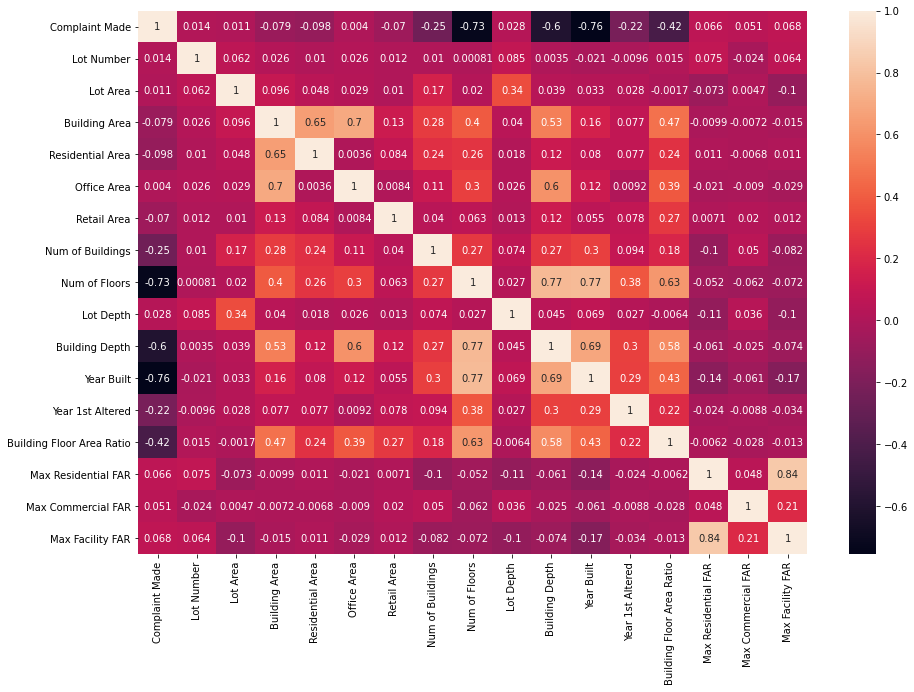

In [129]:
pearson_df = merged_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(pearson_df, annot=True)
plt.show()

<h3> Conclusion of First Approach


From the correlation dataframe and the correlation matrix, 

1. we see that the feature with the highest correlation to a heating complaint being made is the year that the building was built (pearson=-0.7553). 

2. The next highest is the number of floors the house has (pearson=-0.7313) and

3. The depth of the building (Pearson=-0.6021) 

4. The results of the P-values are inconclusive as they are all zero or extremely close to zero. 

From this, we may infer that this binary approach may not be the method for answering our questions.



<h3> Second Approach </h3>
For the second approach, we did the same process as with the first approach except instead of ones and zeros representing a complaint being made, a number was returned for the number of complaints each address had.

We are planning to visualize if the features of the buildings have any correlation with the number of complaints.

In [130]:
# Create a new dataframe for number of complaints for each street
num_com_df.head()
num_com_df = pd.DataFrame({"Number of Complaints" : bronx_heating_df.groupby(["Incident Zip", "Street Name"]).size()}).reset_index()


<h3> Merging the Two Dataframes </h3>

In [131]:
merged_df2 = pd.merge(num_com_df, house_df, how="right", left_on=["Street Name", "Incident Zip"], right_on=["Address", "ZipCode"])
merged_df2.drop(["Street Name", "Incident Zip", "Address", "ZipCode", "X Coord", "Y Coord"], axis=1, inplace=True)
merged_df2["Number of Complaints"].fillna(0, inplace=True)
merged_df2["Number of Complaints"] = merged_df2["Number of Complaints"].astype(int)
merged_df2["Number of Complaints"].value_counts()
merged_df2.head(10)

Number of Complaints  Lot Number  Lot Area  Building Area  \
0                     0           1     15000              0   
1                     0           4     13770            752   
2                     0          10     35000          39375   
3                     0          17      2500          12500   
4                     0          18      1875           8595   
5                   324          19     15625              0   
6                   324          28      2475              0   
7                   324         122       400              0   
8                     0          34      8700           5316   
9                     0          38      5000          14550   

   Residential Area  Office Area  Retail Area  Num of Buildings  \
0                 0            0            0                 1   
1                 0          272            0                 2   
2                 0            0            0                 1   
3             12500            0            0                 1   
4              6876            0         1719                 1   
5                 0            0            0                 0   
6                 0            0            0                 0   
7                 0            0            0                 0   
8                 0            0            0                 2   
9                 0            0            0                 1   

   Num of Floors  Lot Depth  Building Depth  Year Built  Year 1st Altered  \
0            0.0     200.00             0.0           0                 0   
1            1.0     100.00            16.0        1931              1994   
2            2.0     200.00           200.0        1931                 0   
3            5.0     100.00            85.0        1931              2001   
4            5.0      75.00            70.0        1920              2009   
5            0.0     100.00             0.0           0                 0   
6            0.0      98.67             0.0           0                 0   
7            0.0     199.58             0.0           0                 0   
8            1.0     100.00           100.0        1931                 0   
9            3.0     100.00            97.0        1931                 0   

   Building Floor Area Ratio  Max Residential FAR  Max Commercial FAR  \
0                       0.00                 6.02                 5.0   
1                       0.05                 6.02                 5.0   
2                       1.13                 6.02                 5.0   
3                       5.00                 6.02                 5.0   
4                       4.58                 6.02                 5.0   
5                       0.00                 6.02                 5.0   
6                       0.00                 2.43                 0.0   
7                       0.00                 3.44                 0.0   
8                       0.61                 6.02                 5.0   
9                       2.91                 6.02                 5.0   

   Max Facility FAR  
0               6.5  
1               6.5  
2               6.5  
3               6.5  
4               6.5  
5               6.5  
6               4.8  
7               6.5  
8               6.5  
9               6.5

<h3> Find the Pearson Correlation and P-Value of the housing characteristics with the target "Complaint Made" </h3>

In [132]:

corr_df2 = pd.DataFrame(columns=merged_df2.columns[1:], index=["Pearson Corr", "P-Value"])
for column in corr_df2.columns:
    pearson_coef, p_value = stats.pearsonr(merged_df2["Number of Complaints"], merged_df2[column])
    corr_df2[column]["Pearson Corr"] = pearson_coef
    corr_df2[column]["P-Value"] = p_value

corr_df2

Lot Number    Lot Area Building Area Residential Area  \
Pearson Corr  0.00608823  0.00124213   -0.00878389      -0.00795726   
P-Value        0.0685153    0.710158    0.00858445        0.0172735   

             Office Area Retail Area Num of Buildings Num of Floors  \
Pearson Corr  0.00177427 -0.00562281       -0.0429668     -0.117689   
P-Value         0.595516   0.0925013      7.40908e-38  1.68606e-273   

                Lot Depth Building Depth Year Built Year 1st Altered  \
Pearson Corr    0.0142087        -0.1181  -0.277962       -0.0233512   
P-Value       2.12414e-05   2.07135e-275          0      2.79631e-12   

             Building Floor Area Ratio Max Residential FAR Max Commercial FAR  \
Pearson Corr                -0.0476101           0.0282175          0.0231703   
P-Value                     4.2979e-46         3.05826e-17        4.10718e-12   

             Max Facility FAR  
Pearson Corr        0.0265687  
P-Value           1.85436e-15

<h3> Visualise the Pearson Correlations with a correlation matrix </h3>

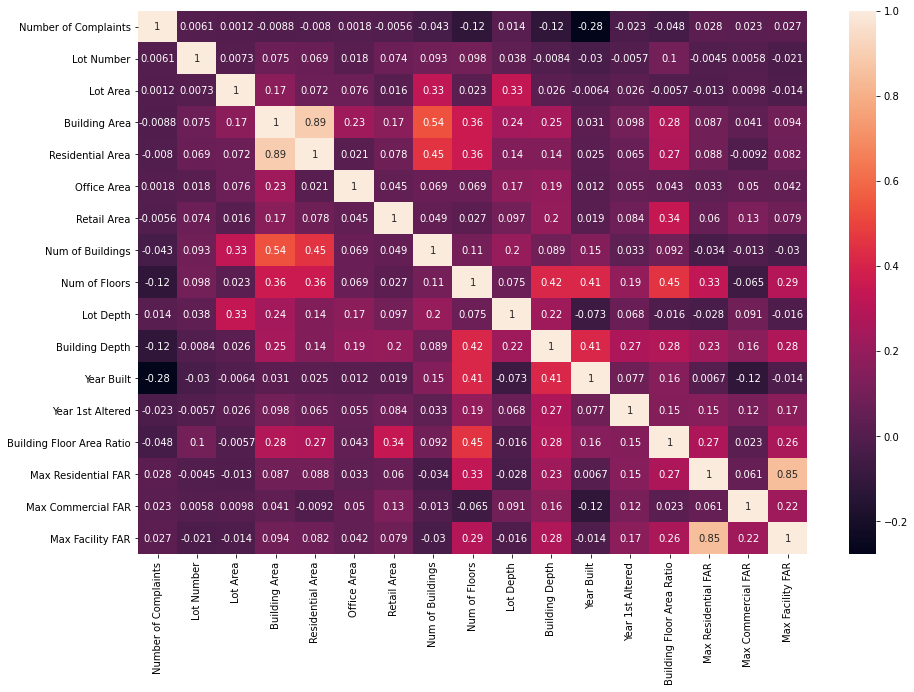

In [133]:
pearson_df2 = merged_df2.corr()
plt.figure(figsize=(15,10))
sns.heatmap(pearson_df2, annot=True)
plt.show()

<h3>Conclusion of Second Approach</h3>
From the pearson correlation, 

1. we see that once again the year the building was built has the highest correlation to the number of complaints made with a pearson correlation value of -0.277962 
2. followed by the building depth and 
3. number of floors. 
4. Also from the p-values of the features, we see that this approach is a better method of finding the correlation between features and complaints made.

The p-values of the second approach are much more promising as there do not seem to be any abnormalities and most of the values are less than or equal to 0.05.

<h3>Conclusion of the Two Approaches </h3>

Overall, for both approaches, the year that the building was built seems to have the highest correlation to complaints being made. Although it is out of the scope of the project, we could think about a possible reason for this correlation such as older buildings were made with less advanced technology compared to more recent buildings.

In [134]:
house_df.to_csv("Housing Information Cleaned.csv", index=False)
merged_df.to_csv("Merged Binary Complaint Approach.csv", index=False)
merged_df2.to_csv("Num of Complaints Approach.csv", index=False)
print("Dataframes saved")

Dataframes saved


<h3> 4.	Can a predictive model be built for future possible complaints of the determined complaint type? </h3>

We continued on from the previous question and its two approaches and created machine learning models for each approach.

<h4> 1. Use a binary approach where the features will either end in a complaint being made(represented by a 1) or not (represented by a 0) </h4>

For binary target (complaint will be made or not): Logistic regression, evaluation using Jaccard score & F1 score


<h4> 2. Consider the total number of complaints for each street based on the building's features </h4>
For predicting the number of complaints:

K-Nearest Neighbors: accuracy score

Multiple linear regression: Residual sum of squares, R^2 or coeffient of determination


In [135]:
binary_df = pd.read_csv("Merged Binary Complaint Approach.csv", dtype={"Incident Address":"object"})
num_com_df = pd.read_csv("Num of Complaints Approach.csv")

In [136]:
binary_df.head()

Incident Address  Complaint Made  Lot Number  Lot Area  \
0  122 BRUCKNER BOULEVARD               0           1     15000   
1  126 BRUCKNER BOULEVARD               0           4     13770   
2  138 BRUCKNER BOULEVARD               0          10     35000   
3  144 BRUCKNER BOULEVARD               0          17      2500   
4  148 BRUCKNER BOULEVARD               0          18      1875   

   Building Area  Residential Area  Office Area  Retail Area  \
0              0                 0            0            0   
1            752                 0          272            0   
2          39375                 0            0            0   
3          12500             12500            0            0   
4           8595              6876            0         1719   

   Num of Buildings  Num of Floors  Lot Depth  Building Depth  Year Built  \
0                 1            0.0      200.0             0.0           0   
1                 2            1.0      100.0            16.0        1931   
2                 1            2.0      200.0           200.0        1931   
3                 1            5.0      100.0            85.0        1931   
4                 1            5.0       75.0            70.0        1920   

   Year 1st Altered  Building Floor Area Ratio  Max Residential FAR  \
0                 0                       0.00                 6.02   
1              1994                       0.05                 6.02   
2                 0                       1.13                 6.02   
3              2001                       5.00                 6.02   
4              2009                       4.58                 6.02   

   Max Commercial FAR  Max Facility FAR  
0                 5.0               6.5  
1                 5.0               6.5  
2                 5.0               6.5  
3                 5.0               6.5  
4                 5.0               6.5

In [137]:
num_com_df.shape

(89522, 17)

In [138]:
num_com_df.head()

Number of Complaints  Lot Number  Lot Area  Building Area  \
0                     0           1     15000              0   
1                     0           4     13770            752   
2                     0          10     35000          39375   
3                     0          17      2500          12500   
4                     0          18      1875           8595   

   Residential Area  Office Area  Retail Area  Num of Buildings  \
0                 0            0            0                 1   
1                 0          272            0                 2   
2                 0            0            0                 1   
3             12500            0            0                 1   
4              6876            0         1719                 1   

   Num of Floors  Lot Depth  Building Depth  Year Built  Year 1st Altered  \
0            0.0      200.0             0.0           0                 0   
1            1.0      100.0            16.0        1931              1994   
2            2.0      200.0           200.0        1931                 0   
3            5.0      100.0            85.0        1931              2001   
4            5.0       75.0            70.0        1920              2009   

   Building Floor Area Ratio  Max Residential FAR  Max Commercial FAR  \
0                       0.00                 6.02                 5.0   
1                       0.05                 6.02                 5.0   
2                       1.13                 6.02                 5.0   
3                       5.00                 6.02                 5.0   
4                       4.58                 6.02                 5.0   

   Max Facility FAR  
0               6.5  
1               6.5  
2               6.5  
3               6.5  
4               6.5

<h3>Approach 1: Binary Approach</h3>

<h3> Model building and training </h3>

In [139]:
# Create the features (X) and target (y)
X = binary_df[binary_df.columns[2:]]
y = binary_df["Complaint Made"]


We standardised the features of X so that the μ of each column is 0, and the σ of each column is 1. 

This will scale featues to have the same mean and standard deviation so that each feature will have a consistent effect on the model and will help minimise bias.

In [140]:
# Scale the feature values
X = StandardScaler().fit(X).transform(X)

In [141]:
X

array([[-1.91e-01,  3.32e-03, -5.69e-02, ...,  2.17e+00,  5.38e+00,
         1.55e+00],
       [-1.87e-01, -6.70e-03, -2.65e-02, ...,  2.17e+00,  5.38e+00,
         1.55e+00],
       [-1.79e-01,  1.66e-01,  1.53e+00, ...,  2.17e+00,  5.38e+00,
         1.55e+00],
       ...,
       [-1.34e-01,  1.28e-03, -5.69e-02, ..., -6.72e-01, -3.25e-01,
        -6.69e-01],
       [-1.05e-01,  3.56e-02, -2.04e-02, ..., -6.72e-01, -3.25e-01,
        -6.69e-01],
       [-1.12e-02, -1.19e-01, -5.69e-02, ..., -6.72e-01, -3.25e-01,
        -6.69e-01]])

The last step before actually training the model is to split the features and target data into training and testing data. 

This will help prevent overfitting and underfitting the model and will also help with evaluating the model with data it has not been trained on. 

We used a 70-30 split of the data. This means that 70% of the features and target data will be used to train the model, and 30% will be used to test the model with new inputs.

In [142]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [143]:
# Build the model
logreg = LogisticRegression(C=0.01, solver='liblinear')

# Train the model and create prediction of the testing data
logreg.fit(X_train, y_train)
yhat = logreg.predict(X_test)


<h3>Model evaluation</h3>

<h3>Jaccard index</h3>

Using Jaccard index evaluate the model

The Jaccard Index is a statistic used to understand the similarities between sample sets. 
If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; if none of the predicted labels matches, it is 0.0. 


In [144]:

jaccard_score(y_test, yhat)

0.9899575323019176

With a Jaccard score of 0.9899, we see that our model has a significant amount of similarities between the testing targets and the predicted values.

<h3> Confusion Matrix </h3>

In [145]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[329149   1080]
 [  2259  23933]]


Confusion matrix, without normalization
[[329149   1080]
 [  2259  23933]]


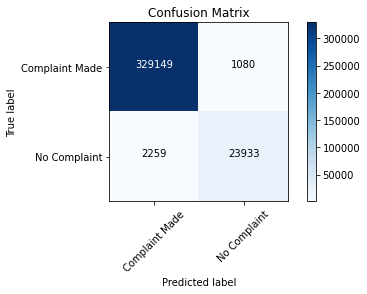

In [146]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Complaint Made','No Complaint'],normalize= False,  title='Confusion Matrix')

Looking at the confusion matrix, it seems that the model is very accurate at predicting when a complaint will be made and when a complaint will not be made. 

Out of 330,229 complaints being made, the model managed to accurately predict 329,149 of them which is about 99.67%. On the other hand, out of 26,192 complaints not being made, the model predicted that 2,259 complaints were made when they weren't. 

This means that the model managed to correctly predict about 91.38% of the buildings that did not make a complaint. Although this is lower than the true positive rate, it is still reasonably accurate.

<h3>F-1 score</h3>

In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It is calculated from the precision and recall of the test.

In [148]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     26192
           1       0.99      1.00      0.99    330229

    accuracy                           0.99    356421
   macro avg       0.98      0.96      0.96    356421
weighted avg       0.99      0.99      0.99    356421



The f-1 score of our logistic regression model is 0.99 which is very accurate.

<h3>Approach 1 conclusion</h3>
Using a train test split of 70-30 and a logistic regression model on our data, we get a jaccard index of 0.989 and an f-1 score of 0.99. Overall the logistic regression model did very well at predicting whether a complaint is made based on the features of a building.

<h3>  Approach 2: Using total number of complaints </h3>
For this approach, we will be trying two different models: a multiple linear regression model and a k-nearest neighbours (classification) model.

<h3>Muliple Linear Regression</h3>
<h3>Model Building and Training</h3>

We created and fitted the multiple linear regression model to the data set of housing characteristics and heating complaints.

In [149]:
# Create the features (X) and target (y)
X = num_com_df[num_com_df.columns[1:]]
y = num_com_df["Number of Complaints"]

In [150]:
# Scale the feature values
X = StandardScaler().fit(X).transform(X)

In [151]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [152]:
# train the model
lr = LinearRegression()
lr.fit(X_train, y_train)
print ('Coefficients: ', lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients:  [  0.38   0.11   3.62  -1.67  -0.39   0.23  -0.18  -2.5   -0.75  -1.07
 -39.03  -0.17  -1.18   5.98  -1.55  -0.98]
Intercept: 11.50494815383225


<h3>Model Evaluation</h3>

In [153]:
# Use the model to create predictions
y_hat = lr.predict(X_test)

# Use ordinary least squares to evaluate the model
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr.score(X_test, y_test))

Residual sum of squares: 31763.86
Variance score: 0.07


As the multiple linear regression underperforms in terms of both the residual sum of squares and variance score, we can assume that the model may not be effective as a predictive tool for future heating complaints.

<h3> K-Nearest Neighbours </h3>

<h3> Find the best K value to use </h3>

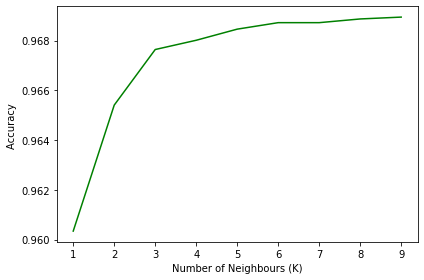

The K value with the highest accuracy is 9 with an accuracy of 0.9689466433332092


In [154]:
# using K of 1 to 10, test the accuracy of the model based on the K value
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)

# plot the accuracy for the different values of K
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

print("The K value with the highest accuracy is", mean_acc.argmax()+1, "with an accuracy of", mean_acc.max())

<h3> Model Building </h3>

In [155]:
# We can use the same train test split as before to train the KNN model
k=9
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=9)

<h3> Model Evaluation </h3>

In [156]:
# make predictions
yhat = neigh.predict(X_test)
print("Train set Accuracy: ", accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Train set Accuracy:  0.9726801244713955
Test set Accuracy:  0.9689466433332092


In [157]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     26041
           1       0.10      0.03      0.05        30
           2       0.25      0.04      0.06        27
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         4
          17       0.00    

We can see that the KNN model using a K value of 9 and a 70-30 split has a very high accuracy of roughly 0.97

<h3> Approach 2 Conclusion </h3>
Between using a multiple linear regression model and a K-nearest neighbours model on our heating complaint dataset, we see that the KNN model is a much better model to use.This means that the KNN model would probably be a better model to use to predict the number of complaints a building will make.



<h3> Prediction Model Results </h3>
<h4> For binary target (complaint made or not):</h4>

Logistic regression -> Jaccard score of 0.9899, F1 score of 0.99

<h4> For predicting the number of complaints: </h4>

K-Nearest Neighbors -> accuracy score of 0.97, 

Multiple linear regression: Residual sum of squares of 31763.86, R^2/coeffient of determination of 0.07

<h2> Conclusion </h2>

Depending on the method the Department of Housing Preservation and Development wants to employ, it is possible to make a predictive model from the data they have. 

If they would like to use the binary approach, a logistic regression model will be a good fit for future predictions. 

On the other hand, if they would like to predict the total number of complaints for a building, then I would recommend the KNN model as I believe that it is a better fit than the multiple linear regression model.